In [1]:
from sympy import symbols, sqrt, Piecewise, init_printing, diff, Derivative, latex, lambdify
from sympy.functions import Abs
from sympy.plotting import plot
from matplotlib import pyplot as pl
init_printing(use_unicode=True)
from IPython.display import display, Latex, Math

In [2]:
a = symbols('a') #actual value
p = symbols('p') #predicted value
w = symbols('w') #leaf weight
delta = symbols('delta') #loss function parameter

## Different loss functions

In [3]:
def pseudo_huber(delta,a,p):
    return delta**2*(sqrt(1+((a-p)/delta)**2)-1)

def weighted_pseudo_huber(w, delta, a, p):
    return delta**2*(sqrt(1+((a-w*p)/delta)**2)-1)

huber = lambda delta,a,p: Piecewise((0.5*(a-p)**2, Abs(a-p) <= delta), (delta*Abs(a-p)-0.5*delta**2, True))
mae = lambda a,p: Abs(a-p)

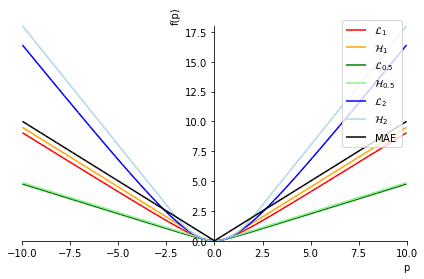

In [4]:
p1 = plot(pseudo_huber(1.0, 0,p), show=False, legend=True, line_color='red')
p1[0].label='$\\mathcal{L}_{1}$'
p05 = plot(pseudo_huber(0.5, 0,p), show=False, line_color='green')
p05[0].label='$\\mathcal{L}_{0.5}$'
p2 = plot(pseudo_huber(2.0, 0,p), show=False, line_color='blue')
p2[0].label='$\\mathcal{L}_{2}$'
h1 = plot(huber(1.0, 0, p), show=False, line_color='orange')
h1[0].label='$\\mathcal{H}_{1}$'
h2 = plot(huber(2.0, 0, p), show=False, line_color='lightblue')
h2[0].label='$\\mathcal{H}_{2}$'
h05 = plot(huber(0.5, 0, p), show=False, line_color='lightgreen')
h05[0].label='$\\mathcal{H}_{0.5}$'
m = plot(mae(0, p), show=False, line_color='black')
m[0].label='$\\mathrm{MAE}$'
p1.extend(h1)
p1.extend(p05)
p1.extend(h05)
p1.extend(p2)
p1.extend(h2)
p1.extend(m)
p1.show()

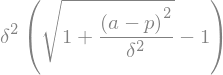

\delta^{2} \left(\sqrt{1 + \frac{\left(a - p\right)^{2}}{\delta^{2}}} - 1\right)


In [5]:
ph = delta**2*(sqrt(1+((a-p)/delta)**2)-1)
display(ph)
print(latex(ph))

### First derivative

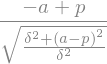

\frac{- a + p}{\sqrt{\frac{\delta^{2} + \left(a - p\right)^{2}}{\delta^{2}}}}


In [6]:
diff1 = ph.diff(p)
display(diff1.simplify())
print(latex(diff1.simplify()))

### Second derivative

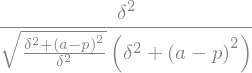

\frac{\delta^{2}}{\sqrt{\frac{\delta^{2} + \left(a - p\right)^{2}}{\delta^{2}}} \left(\delta^{2} + \left(a - p\right)^{2}\right)}


In [7]:
diff2 = ph.diff(p, p)
display(diff2.simplify())
print(latex(diff2.simplify()))

### Taylor series

## Test quadratic approximations

In [8]:
pi = symbols('p_i')
ai = symbols('a_i')


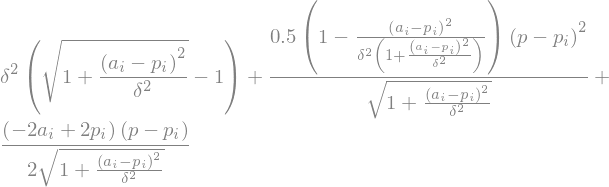

In [9]:
L_T = ph.subs({a:ai,p:pi}) + diff1.subs({a:ai,p:pi})*(p-pi) + 1/2*diff2.subs({a:ai, p:pi})*(p-pi)**2
display(L_T)

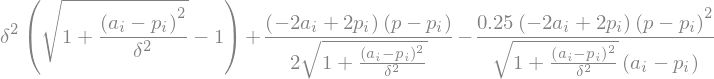

In [10]:
L_D = ph.subs({a:ai,p:pi}) + diff1.subs({a:ai,p:pi})*(p-pi) - 1/2*diff1.subs({a:ai, p:pi})/(ai-pi)*(p-pi)**2
display(L_D)

Let $a_i$ and $p_i$ denote the actual and predicted value of th $i^\mathrm{th}$ example respectively. The true loss is given by

$$L_\delta=\delta^{2} \left(\sqrt{1 + \frac{\left(a - p\right)^{2}}{\delta^{2}}} - 1\right)$$

We'll consider:
1. Taylor expansion of $L_\delta(p)$ about $p_i$:
$$L_\delta^T(p) = \delta^{2} \left(\sqrt{1 + \frac{\left(a_i - p_i\right)^{2}}{\delta^{2}}} - 1\right)
+ \frac{- a_i + p_i}{\sqrt{\frac{\delta^{2} + \left(a_i - p_i\right)^{2}}{\delta^{2}}}}(p-p_i)
+ \frac{\delta^{2}}{2\sqrt{\frac{\delta^{2} + \left(a_i - p_i\right)^{2}}{\delta^{2}}} \left(\delta^{2} + \left(a_i - p_i\right)^{2}\right)} (p-p_i)^2
$$
2. Match value and derivative at $p_i$ and have minimum at $a_i$
$$
L_{\delta}^{\mathrm{D}} = \delta^{2} \left(\sqrt{1 + \frac{\left(a_i - p_i\right)^{2}}{\delta^{2}}} - 1\right)
+ \frac{- a_i + p_i}{\sqrt{\frac{\delta^{2} + \left(a_i - p_i\right)^{2}}{\delta^{2}}}}(p-p_i)
+ \frac{- a_i + p_i}{2\sqrt{\frac{\delta^{2} + \left(a_i - p_i\right)^{2}}{\delta^{2}}}\left(a_i-p_i\right)}(p-p_i)^2
$$

In [11]:
def plot_pi(pival, amin=0):
    Lsub = ph.subs({delta:1.0, a: amin})
    L_Tsub = L_T.subs({delta:1.0, ai: amin, pi:pival})
    L_Dsub = L_D.subs({delta:1.0, ai: amin, pi:pival})
    display(Latex("Values at $p_i$: $$L_1 = {:.3f}\\, L_1^T = {:.3f}\\, L_1^D = {:.3f}$$"
                  .format(float(Lsub.subs({p:pival}).evalf()),
                          float(L_Tsub.subs({p:pival}).evalf()),
                          float(L_Dsub.subs({p:pival}).evalf()),
                         )))
    display(Latex("Values at $a_i$: $$L_1 = {:.3f}\\, L_1^T = {:.3f}\\, L_1^D = {:.3f}$$"
                  .format(float(Lsub.subs({p:amin}).evalf()),
                          float(L_Tsub.subs({p:amin}).evalf()),
                          float(L_Dsub.subs({p:amin}).evalf()),
                         )))
    display(Latex("Derivatives at $p_i$:$$L_1 = {:.3f}\\, L_1^T = {:.3f}\\, L_1^D = {:.3f}$$"
                  .format(float(Lsub.diff(p).subs({p:pival}).evalf()),
                          float(L_Tsub.diff(p).subs({p:pival}).evalf()),
                          float(L_Dsub.diff(p).subs({p:pival}).evalf()),
                         )))
    p1 = plot(Lsub, L_Tsub, L_Dsub, show=False, legend=True, title=r"$p_i={}$".format(pival))
    p1[0].label='$L_{1}$'
    p1[0].line_color='red'
    p1[1].label='$L_{1}^{\mathrm{T}}$'
    p1[1].line_color='blue'
    p1[2].label='$L_{1}^{\mathrm{D}}$'
    p1[2].line_color='green'
    
    p1.show()

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

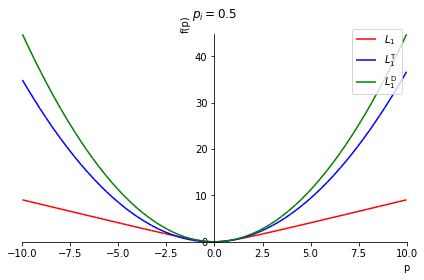

In [12]:
plot_pi(0.5)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

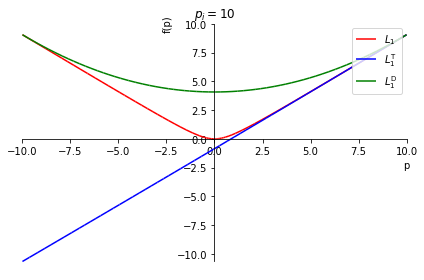

In [13]:
plot_pi(10)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

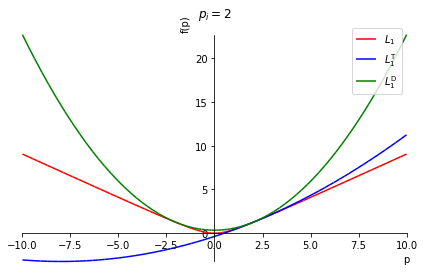

In [14]:
plot_pi(2)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

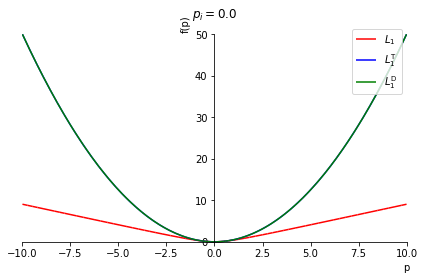

In [15]:
plot_pi(0.0)

## Convergence in XGBoost

In [16]:
import numpy as np
import xgboost as xgb
from typing import Tuple
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [68]:
# X = pd.read_csv('data/housesalesprediction/kc_house_data.csv')

# y = np.array(X['price'])

# X.drop(columns=['id', 'date', 'price', 'zipcode', 'lat', 'long', 'sqft_living15',
#        'sqft_lot15'], inplace=True) # the last once just to keep training faster

X, y = datasets.make_friedman1(10000, noise=5.0)
X_outliers, y_outliers = datasets.make_friedman1(1000, noise=100.0)
X = np.concatenate((X, X_outliers))
y = np.concatenate((y, y_outliers))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [69]:
y.min(), y.max(), y.mean()

In [107]:
def phuber(predt: np.ndarray, dtrain: xgb.DMatrix, delta=1.0) -> Tuple[str, float]:
    ''' Mean squared log error metric.'''
    delta = 1.0
    y = dtrain.get_label()
#     predt[predt < -1] = -1 + 1e-6
    elements = delta**2*(np.sqrt(1+np.square((y-predt)/delta))-1)
    return 'Huber', float(np.mean(elements))

def evaluate(gradient, hessian):
    
    def custom_objective(predt: np.ndarray,
                    dtrain: xgb.DMatrix) -> Tuple[np.ndarray, np.ndarray]:
        '''Evaluate using custom objective'''
        grad = gradient(predt, dtrain.get_label())
        hess = hessian(predt, dtrain.get_label())
#         print("Grad norm: {:.2E} Hess norm: {:.2E}".format(np.linalg.norm(grad), np.linalg.norm(hess)))
        return grad, hess
    results = {}

    xgb.train({'tree_method': 'hist', 'seed': 1994,
               'disable_default_eval_metric': 0, 'eta': 0.1, 'lambda': 0.0},
              dtrain=dtrain,
              num_boost_round=100,
              obj=custom_objective,
              feval=phuber,
              evals=[(dtrain, 'dtrain'), (dtest, 'dtest')],
            evals_result=results)
    return results
    
# def evaluate_mse():
#     xgb.train({'tree_method': 'hist', 'seed': 1994,
#                'disable_default_eval_metric': 0, 'eta': 0.3, 'lambda': 1.0},
#               dtrain=dtrain,
#               num_boost_round=20,
#               evals=[(dtrain, 'dtrain'), (dtest, 'dtest')])

def build_gradient_hessian(func):
    gradient = lambda predt, label: np.vectorize(lambdify((pi, ai), func.diff(p).subs({delta:1.0, p:pi})))(predt, label)
    hessian = lambda predt, label: np.vectorize(lambdify(( pi, ai), func.diff(p, p).subs({delta:1.0, p:pi})))(predt, label)
    return gradient, hessian

## Approximate using Taylor series



In [108]:
gradient_taylor, hessian_taylor = build_gradient_hessian(L_T)

In [109]:
results_taylor = evaluate(gradient_taylor, hessian_taylor)

[0]	dtrain-rmse:41.23436	dtest-rmse:40.29413	dtrain-Huber:25.75926	dtest-Huber:25.47192
[1]	dtrain-rmse:51.79896	dtest-rmse:53.83556	dtrain-Huber:32.00763	dtest-Huber:33.54981
[2]	dtrain-rmse:39.50083	dtest-rmse:39.69500	dtrain-Huber:22.16833	dtest-Huber:22.94339
[3]	dtrain-rmse:39.00299	dtest-rmse:40.11205	dtrain-Huber:20.98328	dtest-Huber:22.23782
[4]	dtrain-rmse:35.41037	dtest-rmse:36.22673	dtrain-Huber:17.35052	dtest-Huber:18.40519
[5]	dtrain-rmse:35.48125	dtest-rmse:36.43253	dtrain-Huber:17.46929	dtest-Huber:18.63565
[6]	dtrain-rmse:33.62011	dtest-rmse:34.31265	dtrain-Huber:14.80056	dtest-Huber:15.81333
[7]	dtrain-rmse:33.27795	dtest-rmse:33.97812	dtrain-Huber:14.26703	dtest-Huber:15.33350
[8]	dtrain-rmse:33.01028	dtest-rmse:33.61495	dtrain-Huber:14.00506	dtest-Huber:15.05905
[9]	dtrain-rmse:32.74027	dtest-rmse:33.25692	dtrain-Huber:13.77804	dtest-Huber:14.79923
[10]	dtrain-rmse:32.48040	dtest-rmse:32.90635	dtrain-Huber:13.50974	dtest-Huber:14.48605
[11]	dtrain-rmse:32.34008	dtest

[93]	dtrain-rmse:31.04049	dtest-rmse:32.08381	dtrain-Huber:11.34113	dtest-Huber:13.35932
[94]	dtrain-rmse:31.03376	dtest-rmse:32.08413	dtrain-Huber:11.32947	dtest-Huber:13.35936
[95]	dtrain-rmse:31.02539	dtest-rmse:32.08638	dtrain-Huber:11.31825	dtest-Huber:13.36045
[96]	dtrain-rmse:31.01962	dtest-rmse:32.08633	dtrain-Huber:11.30817	dtest-Huber:13.35766
[97]	dtrain-rmse:31.01193	dtest-rmse:32.08789	dtrain-Huber:11.29425	dtest-Huber:13.36098
[98]	dtrain-rmse:31.00477	dtest-rmse:32.08308	dtrain-Huber:11.28362	dtest-Huber:13.35607
[99]	dtrain-rmse:30.99844	dtest-rmse:32.08388	dtrain-Huber:11.27328	dtest-Huber:13.35345


In [110]:
gradient_quadratic, hessian_quadratic = build_gradient_hessian(L_D)
results_quadratic = evaluate(gradient_quadratic, hessian_quadratic)

[0]	dtrain-rmse:32.71959	dtest-rmse:32.89029	dtrain-Huber:17.98703	dtest-Huber:18.25253
[1]	dtrain-rmse:32.30129	dtest-rmse:32.48850	dtrain-Huber:17.13624	dtest-Huber:17.42386
[2]	dtrain-rmse:31.95690	dtest-rmse:32.14532	dtrain-Huber:16.38434	dtest-Huber:16.69289
[3]	dtrain-rmse:31.66762	dtest-rmse:31.85486	dtrain-Huber:15.72008	dtest-Huber:16.03647
[4]	dtrain-rmse:31.41562	dtest-rmse:31.61739	dtrain-Huber:15.12619	dtest-Huber:15.46505
[5]	dtrain-rmse:31.20550	dtest-rmse:31.41299	dtrain-Huber:14.59766	dtest-Huber:14.95742
[6]	dtrain-rmse:31.02470	dtest-rmse:31.23770	dtrain-Huber:14.12744	dtest-Huber:14.49895
[7]	dtrain-rmse:30.87035	dtest-rmse:31.08217	dtrain-Huber:13.71221	dtest-Huber:14.09333
[8]	dtrain-rmse:30.73576	dtest-rmse:30.94619	dtrain-Huber:13.33457	dtest-Huber:13.71734
[9]	dtrain-rmse:30.61705	dtest-rmse:30.83385	dtrain-Huber:12.99501	dtest-Huber:13.39469
[10]	dtrain-rmse:30.51417	dtest-rmse:30.74120	dtrain-Huber:12.69273	dtest-Huber:13.10577
[11]	dtrain-rmse:30.42322	dtest

[93]	dtrain-rmse:29.38598	dtest-rmse:29.95363	dtrain-Huber:9.22615	dtest-Huber:10.34399
[94]	dtrain-rmse:29.38329	dtest-rmse:29.95548	dtrain-Huber:9.22089	dtest-Huber:10.34591
[95]	dtrain-rmse:29.38084	dtest-rmse:29.95666	dtrain-Huber:9.21539	dtest-Huber:10.34716
[96]	dtrain-rmse:29.37832	dtest-rmse:29.95689	dtrain-Huber:9.20976	dtest-Huber:10.34905
[97]	dtrain-rmse:29.37690	dtest-rmse:29.95618	dtrain-Huber:9.20640	dtest-Huber:10.34941
[98]	dtrain-rmse:29.37452	dtest-rmse:29.95625	dtrain-Huber:9.20136	dtest-Huber:10.34929
[99]	dtrain-rmse:29.37073	dtest-rmse:29.95463	dtrain-Huber:9.19451	dtest-Huber:10.34908


In [111]:
def gradient(pred,y, delta=2.0):
    pred = pred.ravel()
    diff = pred-y
    g = 2.0*diff
    return g

def hessian(pred, dtrain, delta=2.0):
    h = np.ones(pred.shape)*2.0
    return h

In [112]:
results_mse = evaluate(gradient, hessian)

[0]	dtrain-rmse:32.34104	dtest-rmse:32.80774	dtrain-Huber:17.67219	dtest-Huber:18.01428
[1]	dtrain-rmse:31.65142	dtest-rmse:32.33973	dtrain-Huber:16.55552	dtest-Huber:16.98488
[2]	dtrain-rmse:31.04648	dtest-rmse:31.94223	dtrain-Huber:15.56722	dtest-Huber:16.05771
[3]	dtrain-rmse:30.49285	dtest-rmse:31.62897	dtrain-Huber:14.69989	dtest-Huber:15.31886
[4]	dtrain-rmse:29.99605	dtest-rmse:31.36001	dtrain-Huber:13.95196	dtest-Huber:14.64962
[5]	dtrain-rmse:29.61070	dtest-rmse:31.13727	dtrain-Huber:13.31096	dtest-Huber:14.05960
[6]	dtrain-rmse:29.23985	dtest-rmse:30.95569	dtrain-Huber:12.75409	dtest-Huber:13.56121
[7]	dtrain-rmse:28.92335	dtest-rmse:30.80798	dtrain-Huber:12.26677	dtest-Huber:13.15807
[8]	dtrain-rmse:28.60102	dtest-rmse:30.64605	dtrain-Huber:11.84966	dtest-Huber:12.81458
[9]	dtrain-rmse:28.31364	dtest-rmse:30.59695	dtrain-Huber:11.48881	dtest-Huber:12.57990
[10]	dtrain-rmse:28.04247	dtest-rmse:30.52816	dtrain-Huber:11.17436	dtest-Huber:12.33141
[11]	dtrain-rmse:27.83595	dtest

[94]	dtrain-rmse:19.62713	dtest-rmse:31.36674	dtrain-Huber:7.93731	dtest-Huber:12.92149
[95]	dtrain-rmse:19.58729	dtest-rmse:31.39208	dtrain-Huber:7.92629	dtest-Huber:12.93889
[96]	dtrain-rmse:19.56647	dtest-rmse:31.40072	dtrain-Huber:7.91857	dtest-Huber:12.95567
[97]	dtrain-rmse:19.53906	dtest-rmse:31.40681	dtrain-Huber:7.90749	dtest-Huber:12.96094
[98]	dtrain-rmse:19.49184	dtest-rmse:31.40993	dtrain-Huber:7.89411	dtest-Huber:12.97613
[99]	dtrain-rmse:19.44024	dtest-rmse:31.43980	dtrain-Huber:7.88217	dtest-Huber:13.00332


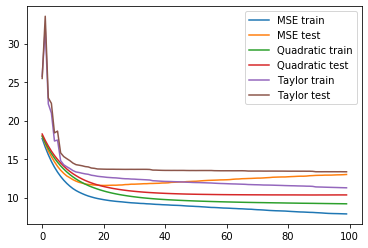

In [114]:
pl.plot(results_mse['dtrain']['Huber'], 'r-' label='MSE train')
pl.plot(results_mse['dtest']['Huber'], label='MSE test')
pl.plot(results_quadratic['dtrain']['Huber'], label='Quadratic train')
pl.plot(results_quadratic['dtest']['Huber'], label='Quadratic test')
pl.plot(results_taylor['dtrain']['Huber'], label='Taylor train')
pl.plot(results_taylor['dtest']['Huber'], label='Taylor test')
pl.legend()